Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Load Dataset

In [6]:
df = pd.read_csv('../data/cardio.csv')

In [7]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
df.shape

(70000, 13)

#Empty values in each column

In [9]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
df.isnull().values.any()

False

In [11]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#Number of  patients with cardiovascular disease and ones without 

In [12]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

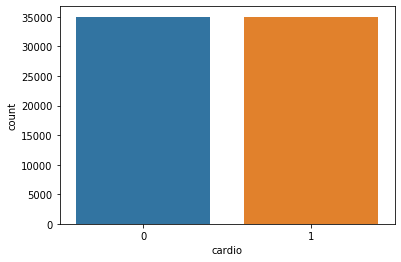

In [13]:
# Visualise 
sns.countplot(df['cardio'])

In [14]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [15]:
#Compare the cardiovascular disease number 
#look years column
df['years'] = (df['age'] / 365).round(0)
df['years'] = pd.to_numeric( df['years'], downcast= 'integer')


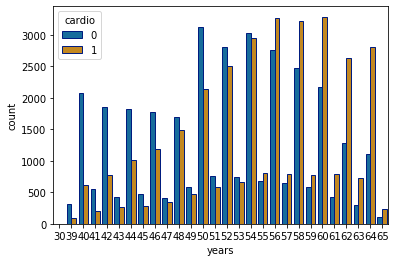

In [16]:
sns.countplot(x='years',hue='cardio',data=df,palette='colorblind',edgecolor= sns.color_palette('dark',n_colors=1))

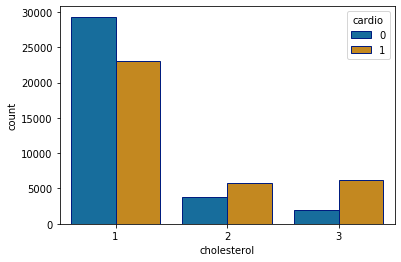

In [17]:
sns.countplot(x='cholesterol',hue='cardio',data=df,palette='colorblind',edgecolor= sns.color_palette('dark',n_colors=1))

In [18]:
#correlation of the columns 
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


visualise the data 

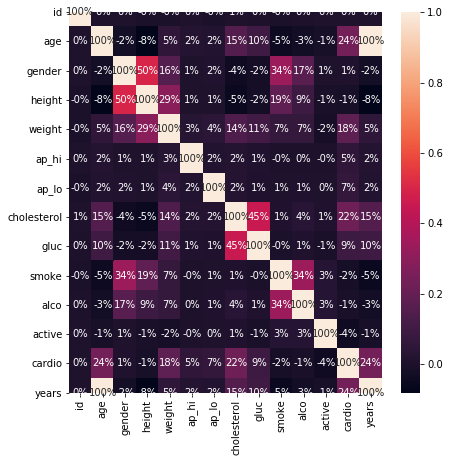

In [19]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True, fmt='.0%', linewidths=0, )

In [24]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48


In [22]:
# ct
cat_cols = list(set(df.columns) - set(df._get_numeric_data().columns))
cat_cols

[]

In [26]:
# nm
num_cols = list(df._get_numeric_data().columns)
num_cols

['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio',
 'years']

In [31]:
#HM
#target = 'cardio'

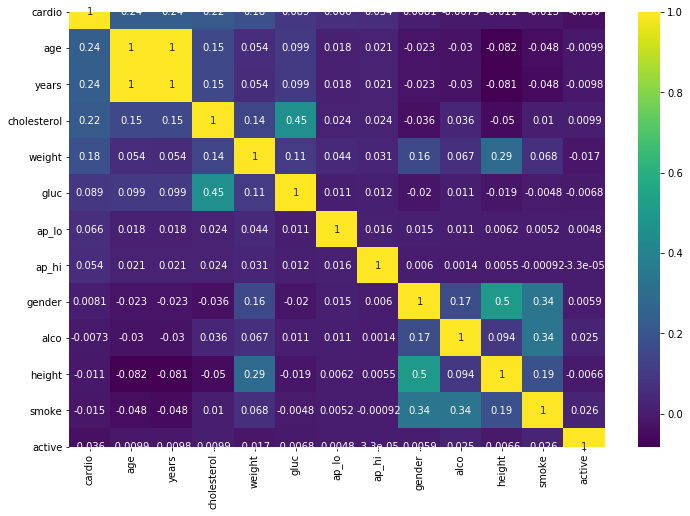

In [34]:
target = 'cardio'
k = 15
cols = df[num_cols].corr().nlargest(k , target)[target].index
cm = df[cols].corr()
plt.figure(figsize = (12,8))
sns.heatmap(cm , annot = True , cmap = 'viridis')
plt.show()

In [38]:
#drop id column 
df.drop('id', inplace=True) 

Split the Data into feature data and target data

In [39]:
y = df['cardio']
x=df.drop(columns='cardio')

In [40]:
#Split data in 75% training data and 25% test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=1)

In [18]:
#To standardize the features...

from sklearn.preprocessing import StandardScaler

std=StandardScaler()
std.fit(x_train)
std.transform(x_test)


array([[-1.3630344 , -0.73462899, -1.38251267, ..., -0.23931996,
         0.49648558, -1.37737024],
       [-2.03605939, -0.73462899, -0.89677042, ..., -0.23931996,
         0.49648558, -1.96806356],
       [ 0.15147431, -0.73462899,  0.0747141 , ..., -0.23931996,
         0.49648558,  0.09936305],
       ...,
       [ 0.45275626,  1.36123134,  0.92476305, ..., -0.23931996,
         0.49648558,  0.39470971],
       [ 1.09905463,  1.36123134,  0.43902079, ...,  4.17850639,
         0.49648558,  1.13307636],
       [-1.63961446, -0.73462899, -0.77533485, ..., -0.23931996,
         0.49648558, -1.6727169 ]])

In [42]:
#Applying KNN with K-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier



The optimal number of neighbors is 31.


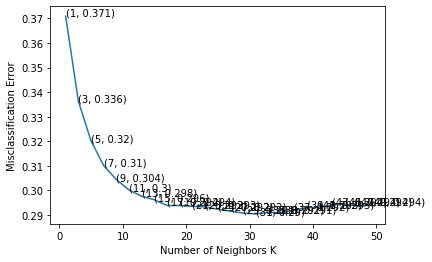

the misclassification error for each k value is :  [0.371 0.336 0.32  0.31  0.304 0.3   0.298 0.296 0.294 0.294 0.293 0.293
 0.292 0.292 0.291 0.29  0.291 0.291 0.292 0.293 0.293 0.294 0.294 0.294
 0.294]


In [43]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [44]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(x_train, y_train)

# predict the response
pred = knn_optimal.predict(x_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))
print(r2_score(y_test,pred))
print(confusion_matrix(y_test, pred))


The accuracy of the knn classifier for k = 31 is 70.617143%
-0.17561955908511595
[[6611 1998]
 [3144 5747]]


In [46]:
#Using logistic regression

from sklearn.linear_model import  LogisticRegression


logR=LogisticRegression(solver='liblinear',penalty='l1')
logR.fit(x_train, y_train)

log_pred=logR.predict(x_test)
acclr = accuracy_score(y_test, log_pred) * 100
print(acclr)
print(r2_score(y_test,log_pred))
print(confusion_matrix(y_test, log_pred))

72.01142857142857
-0.11983364457388124
[[6632 1977]
 [2921 5970]]


/Users/tosodo/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [47]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dec= DecisionTreeClassifier(criterion='gini', random_state=0)
dec.fit(x_train,y_train)
dec_pred=dec.predict(x_test)
acclr = accuracy_score(y_test, dec_pred) * 100
print(acclr)
print(r2_score(y_test,dec_pred))
print(confusion_matrix(y_test,dec_pred))

63.23428571428571
-0.4710105490380465
[[5451 3158]
 [3276 5615]]


In [48]:
import os
print ('default',os.getcwd())


default /Users/tosodo/projects/Cardio_Classifier/notebooks
